# Q.1 Optional

### Importing Libraries

In [12]:
import tensorflow.keras as tk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# library, which provides a progress bar that shows the progress of the loop
from tqdm import tqdm
# Loading the MNIST data

# Note:-
# The MNIST dataset is a set of 70, 000 handwritten digits(0-9), 
# with 60, 000 used for training and 10, 000 used for testing.

mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Plot: Distribution Data

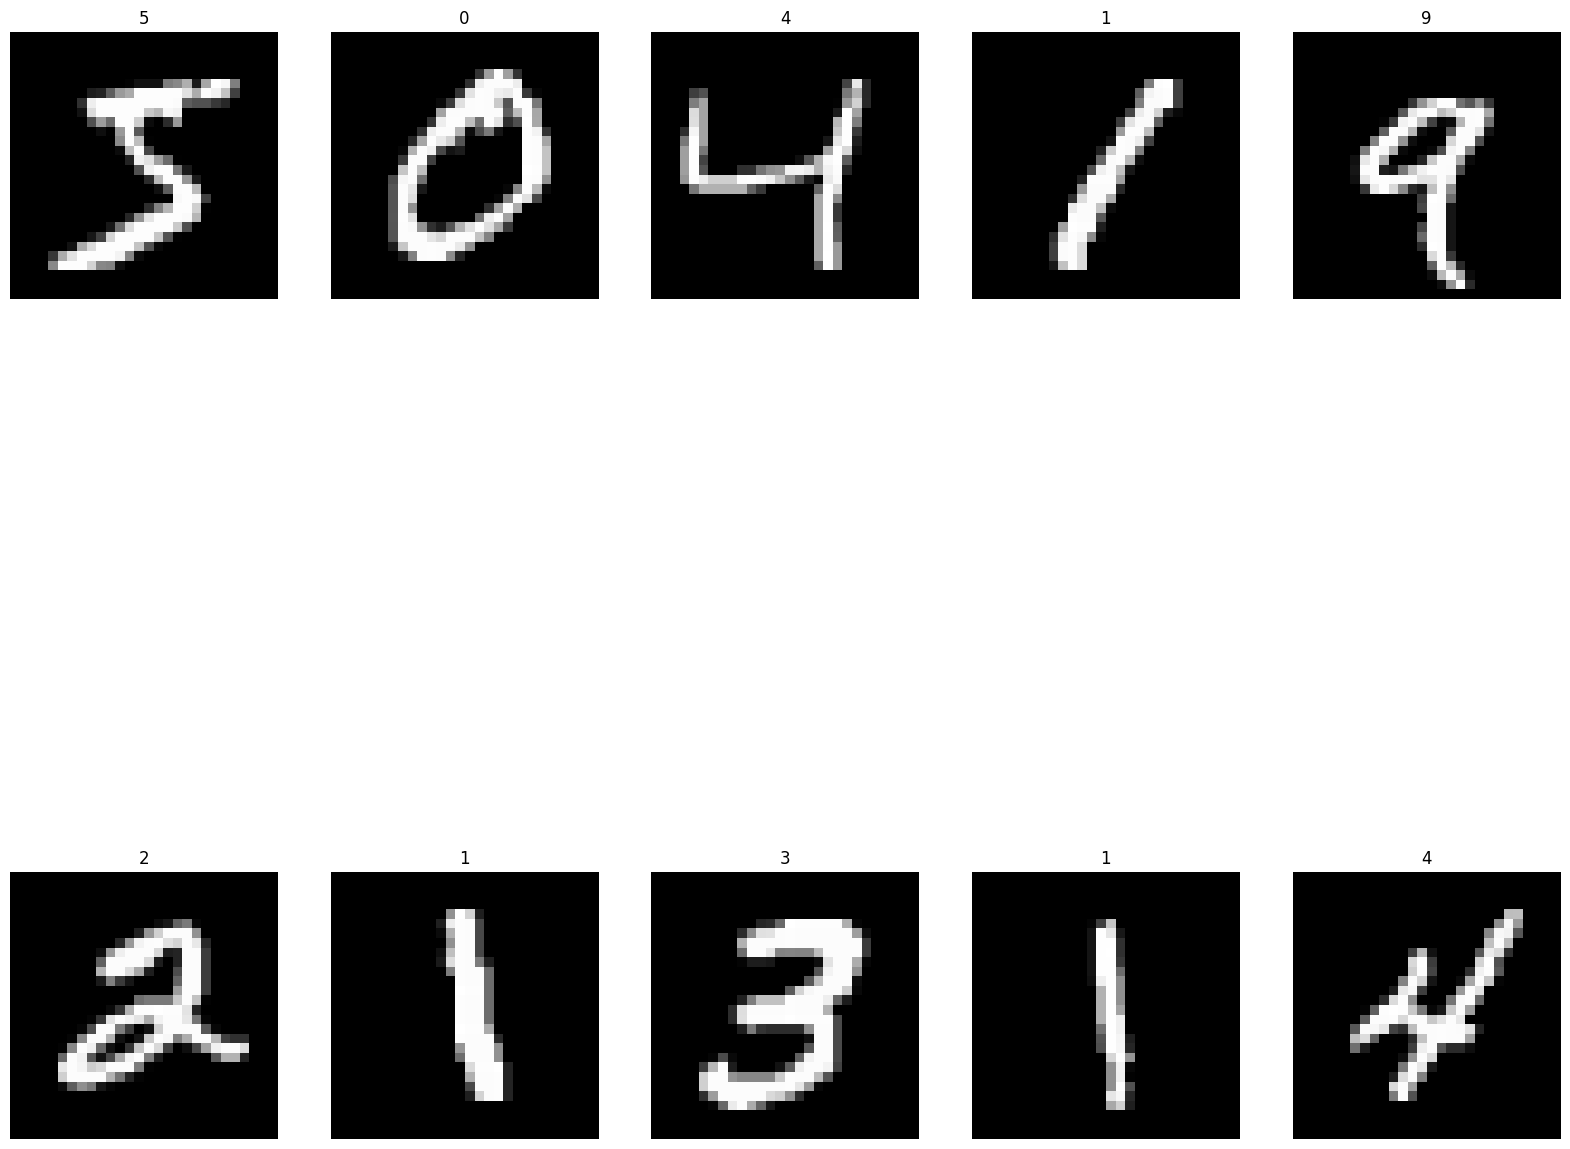

In [13]:
# Set the size of the figure
plt.figure(figsize=(20, 20))

# Iterate through the first 10 images in the training dataset
for i in range(10):

    # Add a subplot to the figure with 2 rows and 5 columns, and select the i+1th subplot
    plt.subplot(2, 5, i+1)

    # Display the image at the i-th index of the x_train dataset, using a grayscale color map
    plt.imshow(x_train[i], cmap="gray")

    # Add a title to the subplot with the corresponding label from the y_train dataset
    plt.title(y_train[i])

    # Hide the x and y axis ticks and labels
    plt.axis("off")

### Visualizing the distribution of training data in a digit recognition task

Text(0.5, 1.0, 'Distribution of the training dataset')

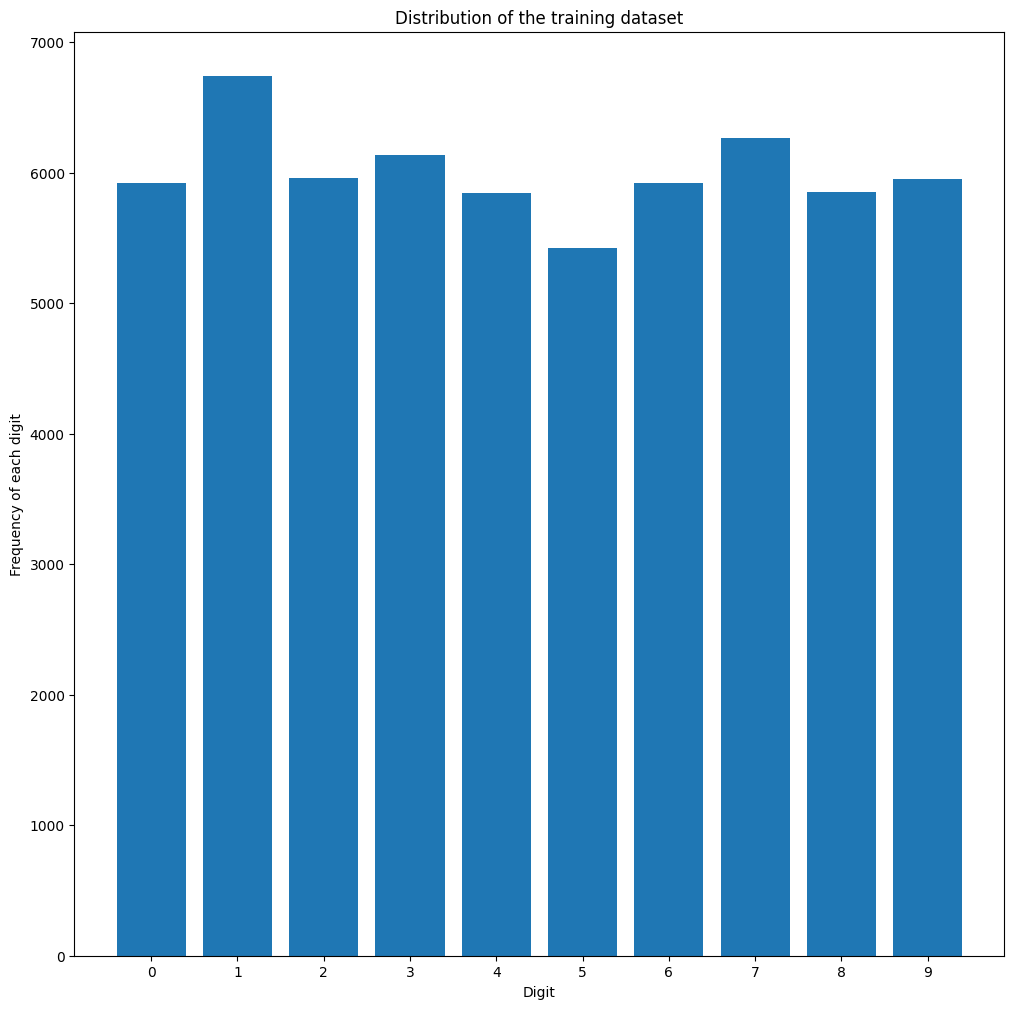

In [14]:
# Count the frequency of each digit in the training data
y_train_count = np.bincount(y_train)
# Create a bar chart to visualize the distribution
plt.figure(figsize=(12, 12))
plt.bar(range(10), y_train_count)
# x-axis represents the digits 0-9
plt.xticks(range(10))
plt.xlabel("Digit")
# y-axis represents the count or frequency of each digit in the training data
plt.ylabel("Frequency of each digit")
# Add appropriate labels and title to the plot
plt.title("Distribution of the training dataset")

### Calculating Prior Probabilities for Multinomial Naive Bayes Classification Model

In [15]:
# Estimating the prior probabilities
prior_prob_digits = y_train_count / len(y_train)
print(prior_prob_digits)

[0.09871667 0.11236667 0.0993     0.10218333 0.09736667 0.09035
 0.09863333 0.10441667 0.09751667 0.09915   ]


### Reshaping and Converting MNIST Dataset into Dataframe

In [16]:
# Earlier this was the shape
x_train.shape

(60000, 28, 28)

In [17]:
# resize the training and testing data from (60,000, 28, 28) to (60,000, 784)
# resize the MNIST dataset
x_train = x_train.reshape(60000, 784)
# convert in dataframe
x_train_df = pd.DataFrame(x_train)
x_test = x_test.reshape(10000, 784)
# convert in dataframe
x_test_df = pd.DataFrame(x_test)
x_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_train.shape

(60000, 784)

### Standardising the dataset

In [19]:
# Normalize the training and testing data by dividing each pixel value by 255.
x_train_df = x_train_df / 255
x_test_df = x_test_df / 255
# Convert the pandas dataframes to numpy arrays
x_train = x_train_df.values
x_test = x_test_df.values
# Print the first few rows of the training data to verify the data is properly loaded.
x_train_df.head()


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part A: Multivariate Gaussian distribution

### Modelling Class Conditional Density as Multivariate Gaussian Distribution
$$f(x) = \frac{1}{\sqrt{(2π)^Ddet(Σ)}}exp \left( −\frac{1}{2}(x − µ)^TΣ^{−1}(x − µ) \right)\\µ: mean, Σ: covariance\;matrix, D: dimension(x)$$

##### We have 10 CLasses, By MLE estimate,
$$µ_c = \frac{\sum_{i=1}^{N} (Z_i = c)x_i}{\sum_{n=1}^{N} (Z_i = c)}$$
$$Σ_c = \frac{\sum_{i=1}^{N} 1(Z_i = c)(x_i-µ_c)(x_i-µ_c)^T}{\sum_{n=1}^{N} (Z_i = c)}$$
where $µ_c$ and $Σ_c$ are the mean and covariance matrix respectively, for each class c.

### Calculating Mean Pixel Values for MNIST Training Data by Digit (0-9)




In [20]:
# Create a 10x784 matrix of zeros for mean
means = np.zeros((10, 784))

# Loop through each digit from 0 to 9
for i in range(10):
    # Select all the training images corresponding to the current digit and calculate the mean along the rows
    # selecting all the training images that belong to class i using the boolean mask y_train == i, 
    # and then calculating the mean of the feature vectors along the rows using np.mean() function with axis=0.
    means[i] = np.mean(x_train[y_train == i], axis=0)

# Convert the means matrix to a pandas DataFrame
means_df = pd.DataFrame(means)

# Display the first few rows of the DataFrame
means_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### As we observe that the Covariance matrix for each class is a singular matrix, we need to regularize it

In the case of the multivariate Gaussian classifier, the sample covariance matrix for each class is estimated from the feature vectors of the training images that belong to that class. However, when the number of training samples is small relative to the number of features, the sample covariance matrix may be singular or ill-conditioned, which can lead to overfitting and poor generalization performance.

To prevent this, a regularization term is added to the diagonal elements of the sample covariance matrix

In [21]:
# To store the regularized covariance matrices for each class
# used in the multivariate Gaussian classifier to estimate the class conditional densities
cov_regularized = np.zeros((10, 784, 784))
for i in range(10):
    # For each class i, we initialize a diagonal matrix diagonal_use of size (784, 784) with zeros everywhere except the diagonal
    diagonal_use = np.zeros((784, 784))
    for j in range(784):
        t = x_train[:, j]
        # calculate variance of t
        var = np.var(t)
        # each feature j in the training data, we compute the variance var of that 
        # feature across all training samples, and add a small constant 0.01 to it. 
        # We then store this value in the corresponding diagonal element of diagonal_use. 

        # This effectively regularizes the diagonal elements of the sample covariance matrix for that class.
        diagonal_use[j][j] = var + 0.01
    cov_regularized[i] = np.cov(x_train[y_train == i].T) + diagonal_use


### Function to calculate the conditional log-likelihood for a given data point and class label




### The CLL is used to classify the data point x as belonging to the digit j or not, based on the estimated parameters of the Gaussian distribution for digit j.

In [22]:
# CLL = -0.5 * ( (x - mu)^T * sigma^-1 * (x - mu) + log(det(sigma)) + Dlog(2pi) )

def calculate_conditional_log_likelihood_mgd(x, j, class_means, class_covariances):
    inverse_covariance_matrix = np.linalg.inv(class_covariances[j])
    determinant_covariance_matrix = np.linalg.det(class_covariances[j])

    # If determinant is zero, add a small value to avoid division by zero
    if determinant_covariance_matrix == 0:
        determinant_covariance_matrix = 0.0000001

    log_determinant_covariance_matrix = np.log(determinant_covariance_matrix)
    difference_from_mean = x - class_means[j]

    # Calculate the dot product of the difference and the inverse of the covariance matrix for the digit j
    dot_product = np.dot(difference_from_mean, inverse_covariance_matrix)
    dot_product = np.dot(dot_product, difference_from_mean.T)

    # Calculate the log of the conditional likelihood for the digit j
    ans = -0.5 * (dot_product + log_determinant_covariance_matrix +
                  784 * np.log(2 * np.pi))
    return ans

### Predictions: Multivariate Gaussian distribution

### Function to predict the class label of a given data point


In [26]:
def prediction_mgd(x):
    class_conditional_log_likelihood_list = [
        #calculate the log of the conditional likelihood for each digit
        calculate_conditional_log_likelihood_mgd(x, j, means, cov_regularized)+np.log(prior_prob_digits[j]) for j in range(10)]
    # Taking the argmax of class_conditional_log_likelihood_list will return the index of the class with the highest predicted probability for x, 
    # which is the predicted class label for x.
    return np.argmax(class_conditional_log_likelihood_list)


### Predict the labels for a batch of test images using the updated Gaussian Naive Bayes model.


In [27]:
# Define a function to predict the labels of a batch of images using the trained model
# Input: x_test: a 2D numpy array of shape (n_test, 784), where n_test is the number of test images
# Output: pred: a 1D numpy array of shape (n_test,) containing the predicted labels for the test images
def prediction_test_images_mgd(x_test):
    prediction_list = []
    for x in x_test:
        prediction_list.append(prediction_mgd(x))
    return np.array(prediction_list)

### Accuracy: Multivariate Gaussian distribution

In [29]:
# Set the number of samples to test
n = 1000
# Make predictions for the first n samples in x_test
y_pred = prediction_test_images_mgd(x_test[:n])
# Initialize a variable to count the number of correct predictions
correct_prediction_counter = 0
# Iterate over the first n elements of y_test, comparing them to the corresponding predictions in y_pred
for i in tqdm(range(len(y_test[:n]))):
    if y_test[i] == y_pred[i]:
        correct_prediction_counter += 1 
# Calculate the accuracy as the ratio of correct predictions to the total number of samples tested
accuracy_mgd = correct_prediction_counter / n
print("Accuracy for Multivariate Gaussian Distribution: {:.9f}".format(accuracy_mgd))

100%|██████████| 1000/1000 [00:00<00:00, 437910.21it/s]

Accuracy for Multivariate Gaussian Distribution: 0.924000000


## Part B: Multivariate Gaussian distribution

### Calculate the value of lambda for each pixel in each digit image. Lambda is a parameter used in the Naive Bayes algorithm to model the likelihood of each pixel being "on" or "off" given the class (digit) of the image.

### Modelling Class Conditional Density as Multivariate Exponential Distribution
$$f(x) = \lambda e^{-\lambda x}$$

##### We have 10 CLasses, By MLE estimate,
$$\lambda_c = \frac{\sum_{n=1}^{N} (Z_i = c)}{\sum_{i=1}^{N} (Z_i = c)x_i}$$
i.e. $$\lambda_c = \frac{1}{µ_c}$$ for each class c.

In [36]:
# create a numpy array of size 10x784 filled with zeros
lambda_list = np.zeros((10, 784))
# show progress
for i in tqdm(range(10)):  # iterate through each digit (0 to 9)
    for j in range(784):  # iterate through each pixel (0 to 783) for the digit i
        # sum up the pixel values for digit i at pixel j
        lambda_value = np.sum(x_train[y_train == i][:, j])
        if lambda_value == 0:  # if the sum is 0, set lambda to 0 to avoid division by 0 error
            lambda_list[i][j] = 0
            # print('|', end="")  # print a vertical bar to indicate zero count
            continue
        # calculate lambda for digit i at pixel j
        lambda_list[i][j] = y_train_count[i]/lambda_value

100%|██████████| 10/10 [01:14<00:00,  7.43s/it]


### Exponential Probability Density Function

In [37]:
# exponential probability density function with rate parameter lambda and input x.
def exponential_pdf(lambda_param, x):
    return lambda_param*np.exp(-lambda_param*x)

### Function to calculate the conditional log-likelihood for a given data point and class label




In [38]:
def calculate_conditional_log_likelihood_med(x, j):
    # Iterate over each pixel of x
    ans = 0
    for i in range(784):
    # Calculate the contribution of each pixel to the likelihood
        lambda_i = lambda_list[j][i]
        exponential_term = exponential_pdf(lambda_i, x[i])
        if exponential_term == 0:
            continue
        likelihood_i = lambda_i * exponential_term
        # Add the contribution to the total conditional log likelihood
        ans += np.log(likelihood_i)
    return ans

### Predictions: Multivariate Exponential distribution

In [39]:
def prediction_med(x):
    # calculate the log of the conditional likelihood for each digit
    class_conditional_log_likelihood_list_med = [calculate_conditional_log_likelihood_med(x, j)+np.log(prior_prob_digits[j]) for j in range(10)]
    # return the index of the digit with the highest log of the conditional likelihood
    return np.argmax(class_conditional_log_likelihood_list_med)

In [40]:
# Given a test dataset of images x_test, this function predicts the label of each image using the median method
def prediction_test_images_med(x_test):
    # Initialize an empty list to store the predicted labels
    predition_list_med = []
    # Iterate over each image in the test dataset
    for x in x_test:
        # Predict the label of the image using the prediction method and append it to the list of predictions
        predition_list_med.append(prediction_med(x))
    # Convert the list of predictions to a numpy array and return it
    return np.array(predition_list_med)


### Accuracy: Multivariate Exponential distribution

In [41]:
# Prediction using our Bayes-Classifier by modeling class conditional densities as Multivariate Exponential distribution
y_pred = prediction_test_images_med(x_test)
correct_prediction_counter_med = 0
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        correct_prediction_counter_med += 1
# Calculate the accuracy as the ratio of correct predictions to the total number of samples tested
accuracy_med = correct_prediction_counter / n
print("Accuracy for Multivariate Gaussian Distribution: {:.9f}".format(accuracy_med))


Accuracy for Multivariate Gaussian Distribution: 0.924000000
